# **Project Name  -  STRAVA FITNESS DATA ANALYTICS CASE-STUDY**

### **Contribution -** Individual

# **Project summary**  - 

This project aimed to analyze user fitness and health behavior using comprehensive data collected from STRAVA. 
Strava is an American internet service for tracking physical exercise which incorporates social network features.Strava records data for a user's activities, which can then be shared with the user's followers or shared publicly.  An activity's recorded information may include a route summary, elevation (net and unidirectional), speed (average and maximum), timing (total and moving time), power and heart rate. 

A total of 18 distinct datasets were used, each covering various aspects of user health, including daily activity, sleep patterns, calories burned, steps taken, sedentary time, weight logs, and BMI.
These datasets were integrated and analyzed using Python (Pandas, Matplotlib, Seaborn), and stored in a SQLite database for efficient querying and management. The analysis involved data cleaning, transformation, visualization, and categorization.

# **Project Github link** - 

# ***Let's Begin !***

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import os

In [3]:
# MySQL connection setup
# Replace with your actual credentials and DB name
user = 'root'
password = '123456'
host = 'localhost'
port = '3306'
database = 'strava'

# Create engine
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# Path to your CSV folder
folder_path = r"C:\Users\rishi\OneDrive\Desktop\Fitabase Data 4.12.16-5.12.16"  # Use raw string (r"") or double backslashes for Windows paths

# Load each CSV into a table
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        table_name = os.path.splitext(file)[0].lower().replace(" ", "_")  # Normalize table name
        print(f"Loading {file} into table `{table_name}`...")
        df = pd.read_csv(file_path)

        try:
            df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)
            print(f"✅ Successfully loaded {table_name}")
        except Exception as e:
            print(f"❌ Failed to load {table_name}: {e}")

Loading dailyActivity_merged.csv into table `dailyactivity_merged`...
✅ Successfully loaded dailyactivity_merged
Loading dailyCalories_merged.csv into table `dailycalories_merged`...
✅ Successfully loaded dailycalories_merged
Loading dailyIntensities_merged.csv into table `dailyintensities_merged`...
✅ Successfully loaded dailyintensities_merged
Loading dailySteps_merged.csv into table `dailysteps_merged`...
✅ Successfully loaded dailysteps_merged
Loading heartrate_seconds_merged.csv into table `heartrate_seconds_merged`...
✅ Successfully loaded heartrate_seconds_merged
Loading hourlyCalories_merged.csv into table `hourlycalories_merged`...
✅ Successfully loaded hourlycalories_merged
Loading hourlyIntensities_merged.csv into table `hourlyintensities_merged`...
✅ Successfully loaded hourlyintensities_merged
Loading hourlySteps_merged.csv into table `hourlysteps_merged`...
✅ Successfully loaded hourlysteps_merged
Loading minuteCaloriesNarrow_merged.csv into table `minutecaloriesnarrow_me

In [4]:
import pandas as pd
import numpy as np
import requests
import os
import glob
import datetime
import calendar
import matplotlib.pyplot as plt
from zipfile import ZipFile
from io import BytesIO
import seaborn as sb

* Inside the fitbit folder, a folder named Fitabase Data 4.12.16-5.12.16 stores 18 csv files with tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
* To better read our files let's create a path variable to store the folder path containing all csv files

In [5]:
import os

folder_path = r"C:\Users\rishi\OneDrive\Desktop\Fitabase Data 4.12.16-5.12.16"

# Get the full path of all the CSV files.
full_path_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                  if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith('.csv')]

print(full_path_list)

['C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\dailyActivity_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\dailyCalories_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\dailyIntensities_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\dailySteps_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\heartrate_seconds_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\hourlyCalories_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\hourlyIntensities_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\hourlySteps_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\minuteCaloriesNarrow_merged.csv', 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\minuteCaloriesWide_merged.csv', 'C:\\Users\\rishi\\O

In [6]:
# Checking for integrity of our path list (should contain 18 file paths):

len(full_path_list)

18

In [7]:
# List of all file paths containing data from Fitbit users:

full_path_list

['C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\dailyActivity_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\dailyCalories_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\dailyIntensities_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\dailySteps_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\heartrate_seconds_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\hourlyCalories_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\hourlyIntensities_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\hourlySteps_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\minuteCaloriesNarrow_merged.csv',
 'C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4.12.16-5.12.16\\minuteCaloriesWide_merged.csv',
 'C:\\Users

### Creating the database¶
First of all, we need to create the database. We do this by creating a connection and starting a cursor in the desired database:

In [8]:
import sqlite3

with sqlite3.connect('fitbit.db') as con:
    con.execute('PRAGMA journal_mode=WAL;')
    print('WAL mode enabled')


WAL mode enabled


In [9]:
import sqlite3

# Create or connect to the database
con = sqlite3.connect("fitbit.db")

# Create a cursor object
cur = con.cursor()

In [10]:
# To easily insert all csv files as different tables in our database we can create a helper function to return the name of the csv file (without extension) to use as the table name.

def get_table_name(full_path_list, i):
    '''Returns name of csv file with no extension'''
    return full_path_list[i].split('/')[-1].split('.')[0]

In [11]:
import sqlite3
import time

def drop_table_safely(table_name, db_name='fitbit.db'):
    success = False
    attempts = 0

    while not success and attempts < 5:
        try:
            with sqlite3.connect(db_name, timeout=30) as con:
                con.execute(f'DROP TABLE IF EXISTS "{table_name}"')
                print(f'Table {table_name} dropped successfully.')
                success = True
        except sqlite3.OperationalError as e:
            if 'database is locked' in str(e):
                attempts += 1
                print(f'Database is locked, retrying in 5 seconds... (Attempt {attempts})')
                time.sleep(5)
            else:
                raise e

    if not success:
        print(f'Failed to drop table {table_name} after multiple attempts.')   

In [12]:
df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [13]:
cur.execute("DROP TABLE IF EXISTS `C:\\Users\\rishi\\OneDrive\\Desktop\\Fitabase Data 4`")
con.commit()

In [14]:
# Listing all tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print(tables)
print(50*'=')
print(f'Total of {len(tables)} tables in database.')

[('dailyCalories_merged',), ('dailyIntensities_merged',), ('dailySteps_merged',), ('heartrate_seconds_merged',), ('hourlyCalories_merged',), ('hourlyIntensities_merged',), ('hourlySteps_merged',), ('minuteCaloriesNarrow_merged',), ('minuteCaloriesWide_merged',), ('minuteIntensitiesNarrow_merged',), ('minuteIntensitiesWide_merged',), ('minuteMETsNarrow_merged',), ('minuteSleep_merged',), ('minuteStepsNarrow_merged',), ('minuteStepsWide_merged',), ('weightLogInfo_merged',), ('sleepDay_merged',), ('dailyActivity_merged',)]
Total of 18 tables in database.


### Checking for redundant information

In [15]:
# To take a closer look at the daily data, let's read table dailyActivity_merged as a dataframe.

In [16]:
dailyActivity_df = pd.read_sql(f'SELECT * FROM dailyActivity_merged', con)

dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [17]:
# We do the same for the dailyIntensities_merged table.

dailyIntensities_df = pd.read_sql(f'SELECT * FROM dailyIntensities_merged', con)

dailyIntensities_df.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [18]:
# These tables appear to have shared columns. Let's first find out if they have the same number of rows.

print(f'dailyActivity_df length: {len(dailyActivity_df)}')
print(f'dailyIntensities_df length: {len(dailyIntensities_df)}')

dailyActivity_df length: 940
dailyIntensities_df length: 940


In [19]:
# The bellow query should return empty if all 8 columns related to Distance and Minutes of activity are redundant between these tables.

query = """
SELECT VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes,
       FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes
FROM dailyActivity_merged
EXCEPT
SELECT VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes,
       FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes
FROM dailyIntensities_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


In [20]:
# The same ideia applies to tables dailyActivity_merged and dailySteps_merged. Both have columns related to total steps taken by date. In the former table this column is named TotalSteps and in the latter, StepTotal. Again, we can execute a EXCEPT statement to check if columns are redundant:

query = """
SELECT TotalSteps from dailyActivity_merged
EXCEPT
SELECT StepTotal from dailySteps_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


In [21]:
# Repeat the same process for column Calories in dailyCalories_merged:

query = """
SELECT Calories from dailyActivity_merged
EXCEPT
SELECT Calories from dailyCalories_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


In [22]:
# dailyIntensities_merged, dailySteps_merged and dailyCalories_merged will not be used further as all information on them is contained in table dailyActivity_merged.

### Updating table to better read date information

update the ActivityDate column in dailyActivity_merged table to match the standard YYY-MM-DD from SQLite.

In [23]:
# Load your database
con = sqlite3.connect('fitbit.db')

# Read table into DataFrame
df = pd.read_sql_query("SELECT * FROM dailyActivity_merged", con)

# Convert ActivityDate to YYYY-MM-DD
df['ActivityDate'] = pd.to_datetime(df['ActivityDate']).dt.strftime('%Y-%m-%d')

# Replace the table with the updated date format
df.to_sql('dailyActivity_merged', con, if_exists='replace', index=False)

print("Date format updated successfully!")


Date format updated successfully!


In [24]:
# To commit the changes
con.commit()

In [25]:
con.close()

### Data reagrding sleeping habbits

In [26]:
# Connect again to database
import sqlite3

# Create or connect to the database
con = sqlite3.connect("fitbit.db")

# Create a cursor object
cur = con.cursor()

In [27]:
sleep_query = """
SELECT
	*
FROM
	sleepDay_merged;
"""

sleep_df = pd.read_sql(sleep_query, con)

In [28]:
sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,-0-0,1,327,346
1,1503960366,-0-0,2,384,407
2,1503960366,-0-0,1,412,442
3,1503960366,-0-0,2,340,367
4,1503960366,-0-0,1,700,712


In [29]:
# Updating the day to match SQLite format YYYY-MM-DD

update_date = """
UPDATE sleepDay_merged set SleepDay = 
	SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), -4)
	|| "-" ||
	CASE
		WHEN LENGTH(
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
		) > 1 THEN 
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
		ELSE '0' ||
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
	END
    || "-" || 
	CASE
	WHEN LENGTH(
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
	) > 1 THEN 
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
        ELSE '0' ||
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
	END;
"""
cur.execute(update_date)

In [30]:
con.commit()

In [31]:
con.close()

In [32]:
import sqlite3
# Create or connect to the database
con = sqlite3.connect("fitbit.db")

# Create a cursor object
cur = con.cursor()

In [33]:
# Now we can check if the updates are correct:

# For the sleep table:
sleep_query = """
SELECT *,
	STRFTIME('%w',SleepDay) dow
FROM sleepDay_merged;
"""

sleep_df = pd.read_sql(sleep_query, con)

In [34]:
sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,dow
0,1503960366,-0-0,1,327,346,None
1,1503960366,-0-0,2,384,407,None
2,1503960366,-0-0,1,412,442,None
3,1503960366,-0-0,2,340,367,None
4,1503960366,-0-0,1,700,712,None


In [35]:
# For the activity table:

dailyActivity_df = pd.read_sql('SELECT * FROM dailyActivity_merged', con)
dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [36]:
# we can use the function STRFTIME() from SQLite to extract information on the day, month, year and day of the week (dow) from the formated dates:

full_info_activity = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow
FROM dailyActivity_merged;
"""

full_dailyActivity_df = pd.read_sql(full_info_activity, con)

In [37]:
full_dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,12,04,2016,2
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,13,04,2016,3
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,14,04,2016,4
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,15,04,2016,5
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,16,04,2016,6


## Analyze

In [38]:
# Creating usefull dataframes

In [39]:
# First, a sanity check on our daily activity table:

# Different users
cur.execute("SELECT COUNT(DISTINCT Id) FROM dailyActivity_merged;")
print('Different users: ', cur.fetchall()[0][0])

Different users:  33


In [40]:
# Average Calories, Steps and Distance by Id and by day of the week
query = """
SELECT 
	Id,
	STRFTIME('%w', ActivityDate) dow,
	ROUND(AVG(Calories),2) AS avg_calories,
	ROUND(AVG(TotalSteps),2) AS avg_steps,
	ROUND(AVG(TotalDistance),2) AS avg_distance
FROM dailyActivity_merged
GROUP BY Id, STRFTIME('%w', ActivityDate);
"""

activity_dist = pd.read_sql(query, con)

In [41]:
activity_dist.head()

,Id,dow,avg_calories,avg_steps,avg_distance
0,1503960366,0,1769.00,10101.50,6.57
1,1503960366,1,1939.25,13780.75,8.96
2,1503960366,2,1967.80,13946.60,8.92
3,1503960366,3,1868.80,12656.60,8.23
4,1503960366,4,1481.60,9500.60,6.10


In [42]:
## "Boolean" column to check if date corresponds to weekend

query = """
SELECT *, CASE WHEN STRFTIME('%w', ActivityDate) IN ('0', '6') THEN 1 ELSE 0 END AS weekend
FROM dailyActivity_merged;
"""

weekend_check = pd.read_sql_query(query, con)
weekend_check.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekend
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1


In [43]:
# Joining activity data with sleep data

query = """
SELECT A.Id, A.ActivityDate, A.SedentaryMinutes, A.LightlyActiveMinutes, S.TotalMinutesAsleep
FROM dailyActivity_merged A
JOIN sleepDay_merged S ON A.Id = S.Id AND A.ActivityDate = S.SleepDay;
"""

activity_sleep_df = pd.read_sql_query(query, con)
activity_sleep_df.head()

,Id,ActivityDate,SedentaryMinutes,LightlyActiveMinutes,TotalMinutesAsleep


## visualizations

### 1 - How users spend their activity time?

There are 4 type of users:
* somewhat active - 33.3%
* sedentary - 29.2%
* active - 20.8%
* low active - 16.7%


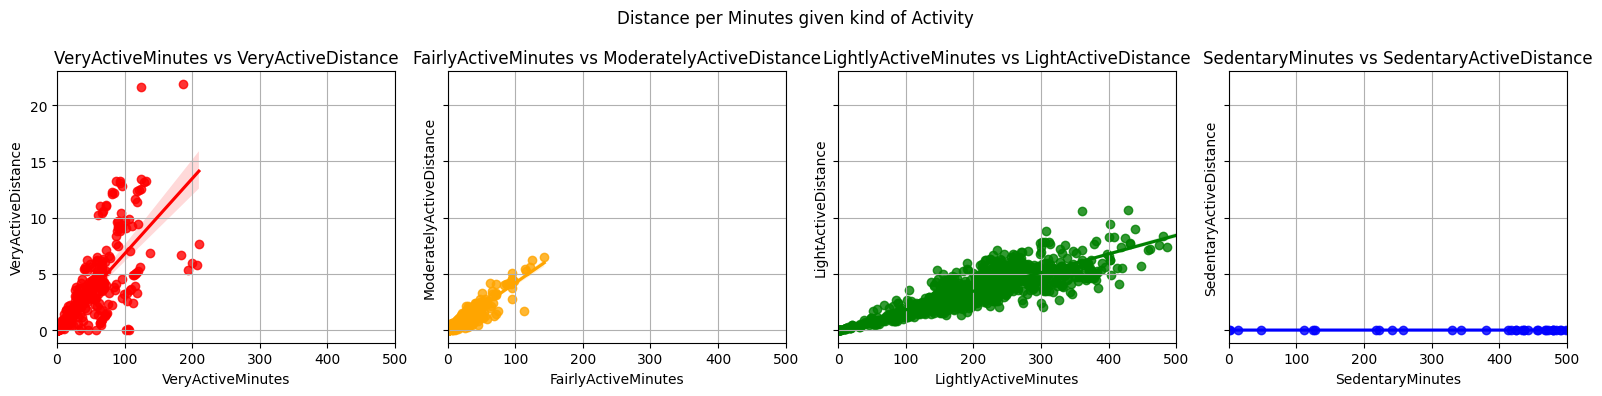

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
fig.suptitle('Distance per Minutes given kind of Activity')

# Define activities and colors
activities = [
    ('VeryActiveMinutes', 'VeryActiveDistance', 'red'),
    ('FairlyActiveMinutes', 'ModeratelyActiveDistance', 'orange'),
    ('LightlyActiveMinutes', 'LightActiveDistance', 'green'),
    ('SedentaryMinutes', 'SedentaryActiveDistance', 'blue')
]

for ax, (x, y, color) in zip(axes, activities):
    sb.regplot(data=dailyActivity_df, x=x, y=y, ax=ax, color=color)
    ax.set_xlim([0, 500])
    ax.grid(True)  # Add gridlines
    ax.set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()

#### observation

1. Very Active Minutes vs. Very Active Distance (Red)
* Strong Positive Correlation: As Very Active Minutes increase, Very Active Distance also increases significantly.
* Clear Trend Line: Indicates consistent data, showing that people who spend more time in very active activities cover more distance.
* Outliers: A few points deviate from the main cluster, but overall, the relationship is very linear.

2. Fairly Active Minutes vs. Moderately Active Distance (Orange)
* Moderate Positive Correlation: As Fairly Active Minutes increase, Moderately Active Distance also increases.
* Tighter Cluster: Data points are more concentrated compared to the very active plot, meaning most people spend a smaller range of time in fairly active activities.

3. Lightly Active Minutes vs. Light Active Distance (Green)
* Strong Positive Correlation: Shows a linear increase in distance with increased Lightly Active Minutes.
* Wider Spread: People show a more varied range of lightly active time, but the relationship remains strong.

4. Sedentary Minutes vs. Sedentary Active Distance (Blue)
* Flat Relationship: No visible increase in distance with more sedentary time.
* Insight: This makes sense because sedentary minutes typically involve minimal or no movement, so distance covered remains negligible.

Overall Conclusion:
* Active minutes (very, fairly, lightly) directly impact distance covered.
* Sedentary minutes do not contribute to distance at all.
* Your dataset and visualizations are giving a clear picture of how activity intensity is linked to physical movement.

### 2 - How does the number of steps taken in a day affect the amount of calories burned?

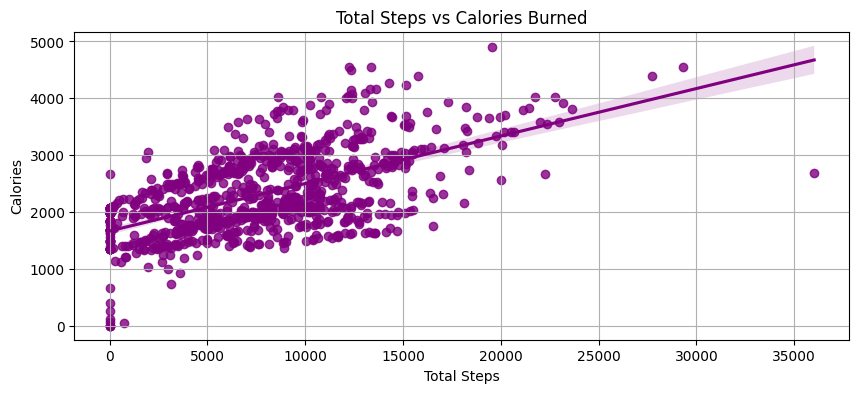

In [45]:
plt.figure(figsize=(10, 4))
sb.regplot(data=full_dailyActivity_df, x='TotalSteps', y='Calories', color='purple')  
plt.grid(True) 
plt.title('Total Steps vs Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories')

plt.show()

#### observation

* There is a positive correlation between the number of steps and calories burned.
* As Total Steps increase, Calories burned also tend to increase.

**1 Positive Slope:**
* The regression line shows that people who take more steps usually burn more calories.

**2 High Density at Lower Step Counts:**
* Many data points are clustered between 0 to 15,000 steps and calories around 1,500 to 3,000.
* Suggests that most users typically stay within this range of daily activity.

**3 Outliers:**
* There are some outliers where people have extremely high step counts (above 30,000 steps) with relatively varying calorie burns.
* Possible reasons: Individual metabolic differences, data entry errors, or different activity intensities.

**Flat Zones:**
* Noticeable horizontal clusters where calories burned remain similar despite varied step counts.
* This could indicate:
   * Some steps may not be intense enough to significantly increase calorie burn.
   * People may be achieving similar calorie burns through different combinations of steps and other activities.

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [47]:
# define our inputs (X) and outputs (y) for the regression. This should be arrays so we take the .values from our dataframes:
# .reshape() on X because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That's exactly what the argument (-1, 1) of .reshape() specifies.
X = full_dailyActivity_df['TotalSteps'].values.reshape((-1, 1))
y = full_dailyActivity_df['Calories'].values

In [48]:
# instantiate the model and fit it to the data.

model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
# get the intercept value and the slope as follows.

print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1665.7426768758335
slope: [0.08351327]


Draw the regression line in the same figure as the scatter plot for our data and see if the fit is similar to that obtained with seaborn's regplot.
To actually draw the line, we define a abline function to use matplotlib to draw a line in 2D space from the slope and intercept.

In [50]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color= 'r', ls = '--')

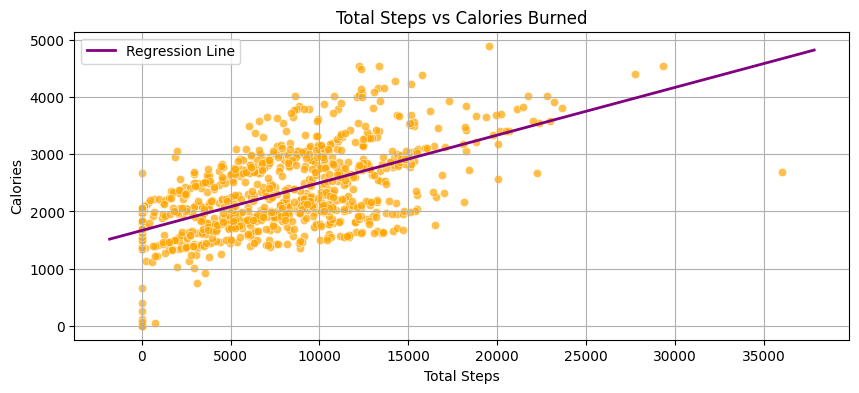

In [51]:
plt.figure(figsize=(10, 4))
sb.scatterplot(data=full_dailyActivity_df, x='TotalSteps', y='Calories', color='orange', alpha=0.7)

# Plot regression line
x_vals = np.array(plt.gca().get_xlim())
y_vals = model.intercept_ + model.coef_[0] * x_vals
plt.plot(x_vals, y_vals, color='purple', linewidth=2, label='Regression Line')
plt.grid(True)
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.title('Total Steps vs Calories Burned')
plt.legend()
plt.show()

#### observation

1. Positive Correlation:
* The regression line clearly shows a positive linear relationship between Total Steps and Calories burned.
* As the number of steps increases, calories burned generally increase.

2. Scatter Distribution:
* Most data points are densely clustered between 0 and 15,000 steps and calories between 1,500 to 3,500.
* This suggests that most users fall within this daily activity range.

 3. Outliers:
* There are a few points with very high step counts (over 30,000 steps) and varying calorie burns.
* These could represent:
    * Exceptionally active days.
    * Users with higher metabolic rates.
    * Possible device misreadings or data anomalies.

 4. Spread and Variance:
* Even though there is a positive trend, there is considerable variance at similar step counts.
* For example:
    * Some users burn significantly more or fewer calories even with similar step counts.
* Possible factors:
    * Individual metabolism
    * Body weight differences
    * Duration and intensity of steps
    * Additional physical activities not captured as steps

### 3 - Distribution according to type of activity

Excluding SedentaryMinutes, all users spend their daily time between three types of activities:

* VeryActiveMinutes
* FairlyActiveMinutes
* VeryLightlyActiveMinutes
  
We can use histograms to check how are this minutes distributed accross users:

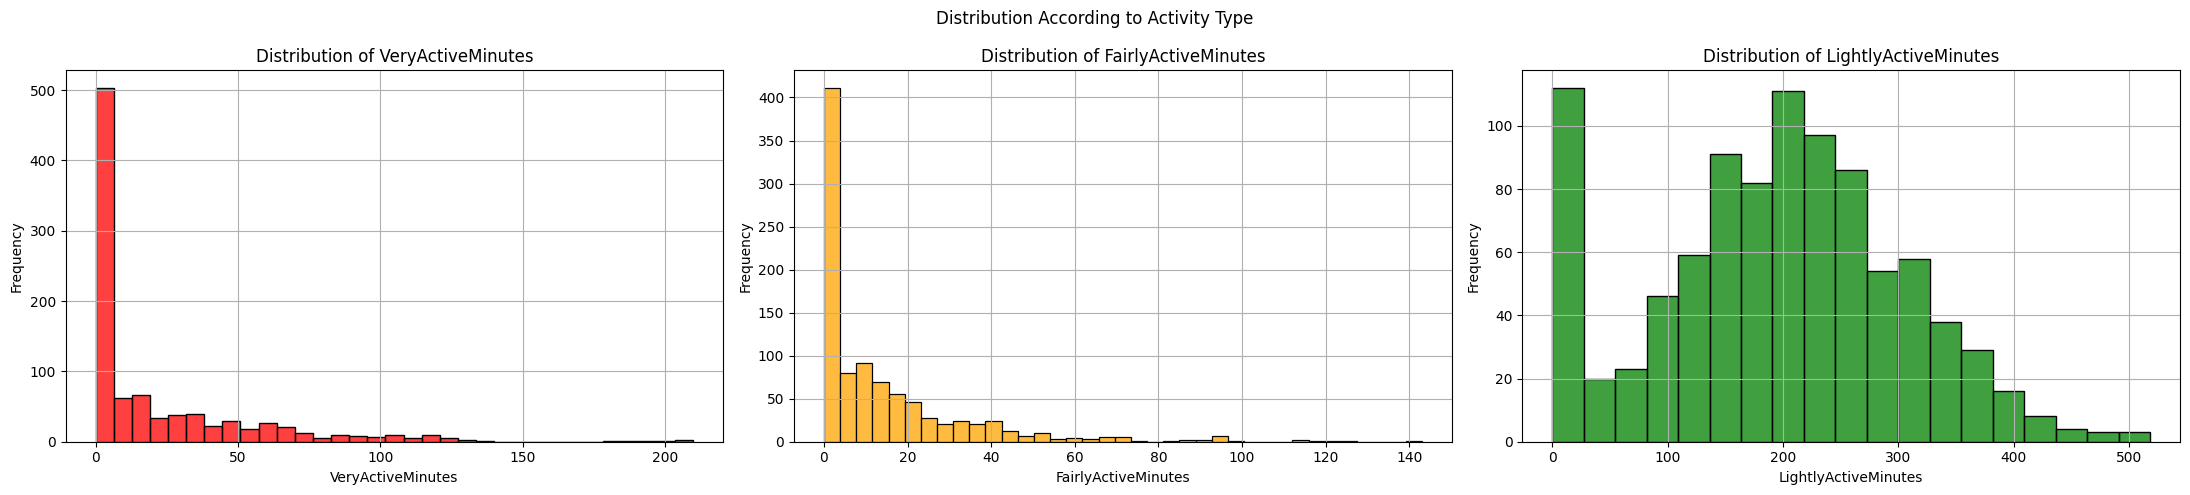

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution According to Activity Type')

# Plot list to simplify colors and columns
activities = [
    ('VeryActiveMinutes', 'red'),
    ('FairlyActiveMinutes', 'orange'),
    ('LightlyActiveMinutes', 'green')
]

# Loop through each activity type
for ax, (activity, color) in zip(axes, activities):
    sb.histplot(data=full_dailyActivity_df, x=activity, ax=ax, color=color)
    ax.grid(True)
    ax.set_xlabel(activity)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {activity}')

plt.tight_layout()
plt.show()


#### observation

According to this graph we can see :
* Most users are **not engaging in high-intensity activities regularly.**
* The primary form of physical activity is **light movement** like walking.
* There is a **potential opportunity to encourage users to increase very active and fairly active minutes** for better health outcomes.
  
**1️ - Very Active Minutes Distribution (Left Graph - Red)**
* The distribution is heavily right-skewed.
* Most users have very low VeryActiveMinutes, typically less than 20 minutes per day.
* Very few people engage in more than 100 minutes of very active movement in a day.

**2️ - Fairly Active Minutes Distribution (Middle Graph - Orange)**
* Also right-skewed, but less extreme than VeryActiveMinutes.
* Majority of users spend less than 30 minutes per day in fairly active movement.
* Only a small fraction of users cross 60+ minutes in this category.

**3️ - Lightly Active Minutes Distribution (Right Graph - Green)**
* Distribution is much more balanced and closer to normal.
* Many users spend significant time in light activity, mostly ranging between 100 to 400 minutes per day.
* This suggests that light activity is the most common form of movement in daily routines.

### 4 - Sleeping habits and week day distributions

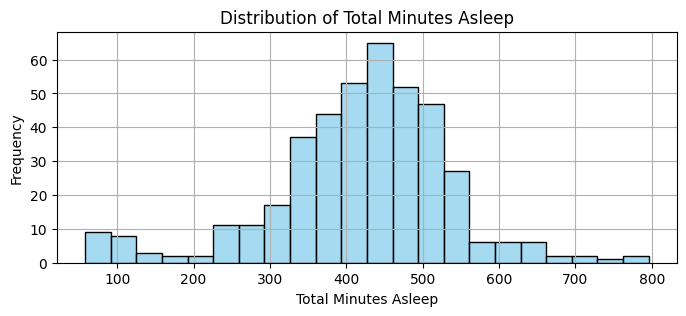

In [53]:
plt.figure(figsize=(8, 3))
sb.histplot(data=sleep_df, x='TotalMinutesAsleep', color='skyblue')  
plt.grid(True)  
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.title('Distribution of Total Minutes Asleep')
plt.show()

#### observation

* The **majority of sleep durations** are concentrated between 400 to 500 minutes (approximately **6.5 to 8 hours**), which is considered a healthy sleep range.
* The distribution is slightly **right-skewed**, indicating that fewer people sleep for extremely long durations.
* Very few instances of sleep are observed below 200 minutes or above 700 minutes, **suggesting that extreme sleep patterns are rare in this dataset**.

* According to the CDC an adult should get 7 or more hours of sleep per day. This corresponds to 420 minutes. We can plot a line at this value to see how the users do against this recommendation.

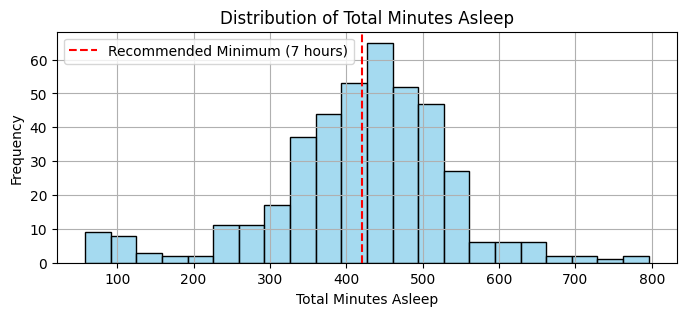

In [54]:
plt.figure(figsize=(8, 3))
sb.histplot(data=sleep_df, x='TotalMinutesAsleep', color='skyblue')

# Add vertical line at 420 minutes
plt.axvline(420, color='red', linestyle='--', label='Recommended Minimum (7 hours)')
plt.grid(True)
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.title('Distribution of Total Minutes Asleep')
plt.legend()

plt.show()

#### Observation 
* Most people **sleep between 400 and 500 minutes** (approximately 6.5 to 8.3 hours).
* The **peak frequency** is just above **420 minutes** (7 hours), which is the **recommended minimum sleep duration** (indicated by the red dashed line).
* Very few individuals sleep less than 300 minutes (5 hours) or more than 700 minutes (11.5 hours).
* The distribution is right-skewed, meaning fewer people sleep excessively long hours.

In [55]:
# looking at distributions across days of the week, we can use our activity_dist dataframe to inspect the average values of steps,calories and distances:

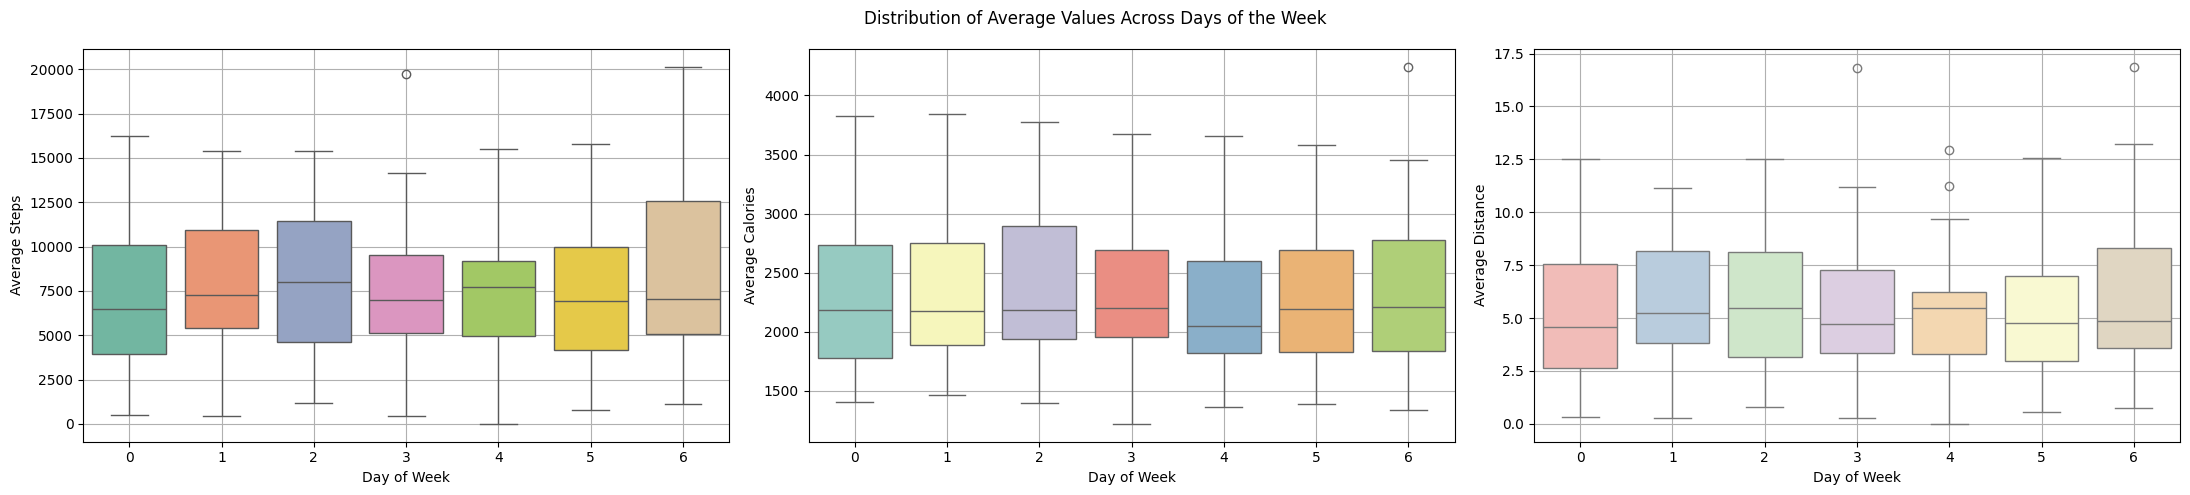

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution of Average Values Across Days of the Week')

# Boxplot for Average Steps
sb.boxplot(x="dow", y="avg_steps", hue="dow", data=activity_dist, ax=axes[0], palette='Set2', legend=False)
axes[0].grid(True)
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Average Steps')

# Boxplot for Average Calories
sb.boxplot(x="dow", y="avg_calories", hue="dow", data=activity_dist, ax=axes[1], palette='Set3', legend=False)
axes[1].grid(True)
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Average Calories')

# Boxplot for Average Distance
sb.boxplot(x="dow", y="avg_distance", hue="dow", data=activity_dist, ax=axes[2], palette='Pastel1', legend=False)
axes[2].grid(True)
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Average Distance')

plt.tight_layout()
plt.show()

#### Observation

**Average Steps (avg_steps):**
* Highest median step count is observed on Sunday (6).
* Weekdays (0–4) show more consistent but slightly lower step counts.
* More variability is visible on weekends, indicating differing activity levels.

**Average Calories (avg_calories):**
* Sunday (6) and Saturday (5) show a higher spread and median in calories burned.
* Weekdays appear more consistent with slightly lower calorie burn.
    
**Average Distance (avg_distance):**
* Follows a similar pattern as steps, with weekends showing higher variability and median values.
* Indicates more physical activity during weekends (likely leisure activities or workouts).

* Overall, physical activity (steps, distance, and calories) tends to increase on weekends, suggesting more free time for exercise or outdoor movement.

### 5 - Distribution of calories and distance

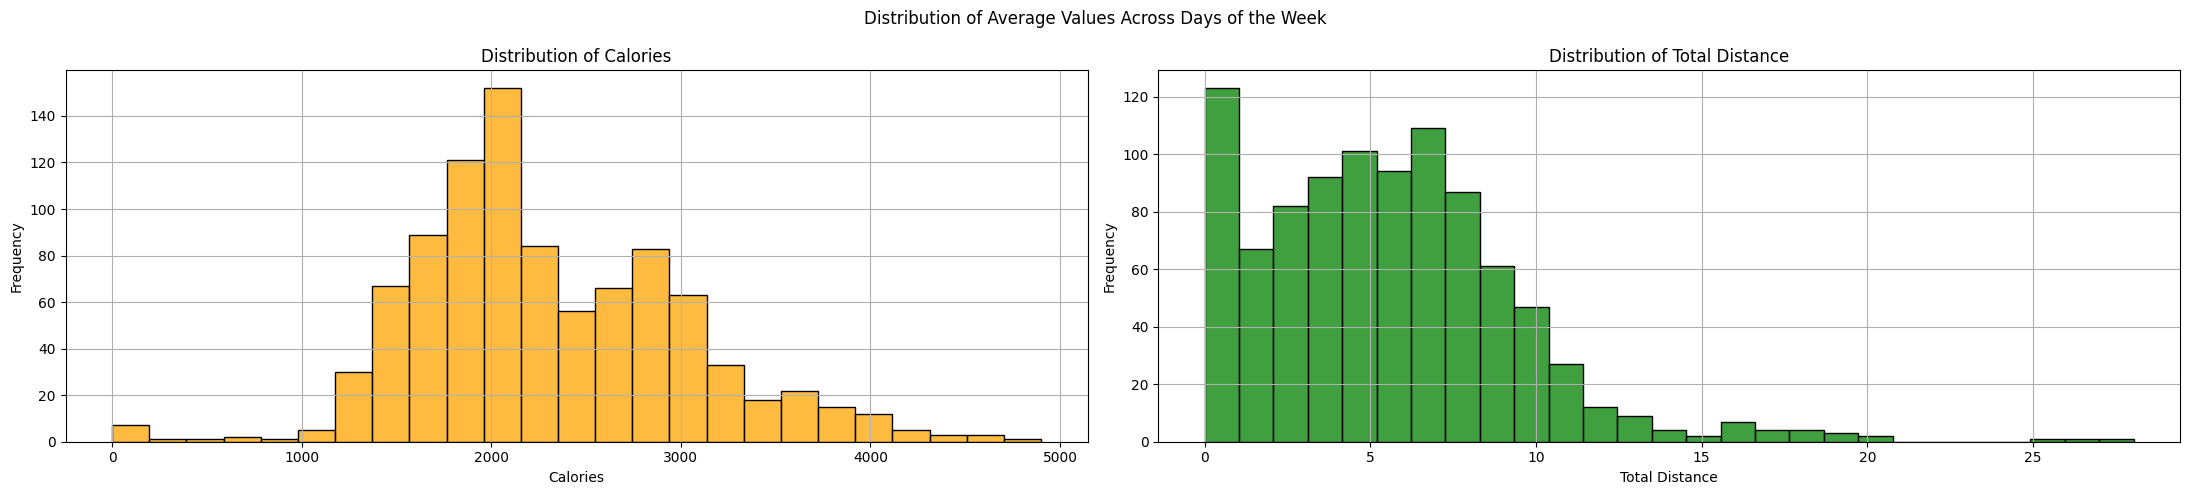

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribution of Average Values Across Days of the Week')

# Histogram for Calories
sb.histplot(data=full_dailyActivity_df, x="Calories", ax=axes[0], color='orange')
axes[0].grid(True)
axes[0].set_xlabel('Calories')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Calories')

# Histogram for Total Distance
sb.histplot(data=full_dailyActivity_df, x="TotalDistance", ax=axes[1], color='green')
axes[1].grid(True)
axes[1].set_xlabel('Total Distance')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Total Distance')

plt.tight_layout()
plt.show()


#### observation

* **Calories Distribution**: Most of the calorie values are concentrated between **1500 and 3000 calories**, with a peak around 2200 calories. The distribution is slightly **right-skewed, indicating that a few days have higher calorie burns.**

* **Total Distance Distribution**: Majority of the distances fall between **0 and 10 kilometers, peaking around 3-5 kilometers**. The distribution is heavily **right-skewed, suggesting that high-distance days are less frequent.**

### 6 - How does sedentary minutes change in weekends?

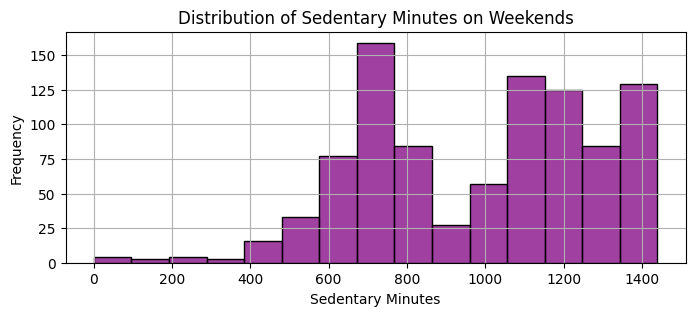

In [58]:
plt.figure(figsize=(8, 3))
sb.histplot(data=weekend_check, x='SedentaryMinutes', color='purple')
plt.grid(True)
plt.xlabel('Sedentary Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Sedentary Minutes on Weekends')
plt.show()

#### observation

* The distribution of sedentary minutes on weekends is **bimodal** (two peaks).
* Many people spend either **around 600–800 minute** or **1100–1400 minutes** being sedentary.
* Few people have very low sedentary minutes (less than 400).
* Overall, a significant number of individuals tend to be highly inactive on weekends

To get a visual on how this distribution depends on weekends we can use our weekend_check dataframe and use a facetplot to see two graphs (for weekend being true or false). Besides this, I'll normalize the distributions so we can compare both graphs (because there a lot fewer weekends than week days - sadly...).

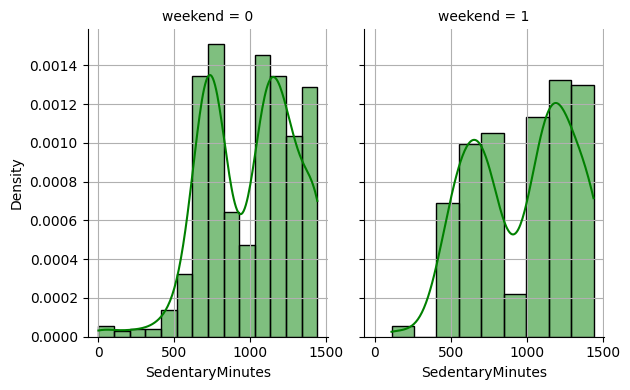

In [59]:

g = sb.FacetGrid(weekend_check, col="weekend", height=4, aspect=0.8)
g.map(sb.histplot, "SedentaryMinutes", kde=True, stat='density', color='green')

for ax in g.axes.flat:
    ax.grid(True)

plt.show()

#### observation 

**Weekdays (weekend = 0):**
* Sedentary minutes are **more spread out** with several peaks.
* The distribution shows **higher density around 600 to 1000 sedentary minutes.**
* This suggests that on weekdays, people tend to have **variable sedentary time,** likely due to work routines or mixed activities.

**Weekends (weekend = 1):**
* Sedentary minutes are **more concentrated on the higher side**, mostly between **1100 to 1500 minutes.**
* The peak is more **consistent and less spread out** compared to weekdays.
* This indicates that people generally spend **more time being sedentary on weekends**, possibly resting or being less active.

**Comparison:**
* People are generally **more sedentary on weekends** than weekdays.
* There is a visible **shift towards higher sedentary minutes on weekends**.



### 7-  BMI Distribution

According to standard BMI values from hdfclife we have,

* Underweight: BMI less than 18.5
* Normal weight: BMI between 18.5 and 24
* Overweight: BMI between 25 and 29.9
* Obese: BMI above 30

In [60]:
weightLogInfo_merged = pd.read_sql('SELECT * FROM weightLogInfo_merged', con)

# Apply BMI categorization
weightLogInfo_merged['bmi_log'] = weightLogInfo_merged['BMI'].apply(lambda x: 
                        'Underweight' if x < 18.5 else 
                        ('Normal weight' if 18.5 <= x <= 24 else 
                        ('Overweight' if 25 <= x <= 29.9 else 'Obesity')))

weightLogInfo_merged.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,bmi_log
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,1,1462233599000,Normal weight
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,1,1462319999000,Normal weight
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,0,1460509732000,Obesity
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,1,1461283199000,Normal weight
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,1,1463097599000,Normal weight


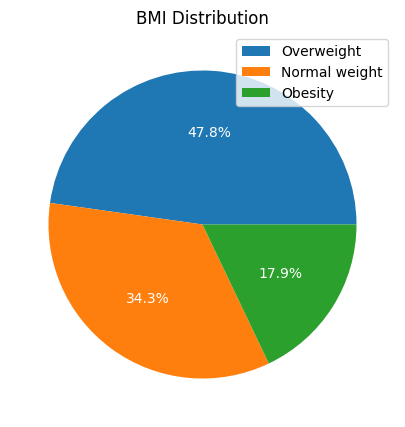

In [61]:
bmi_log_count = weightLogInfo_merged['bmi_log'].value_counts()

plt.figure(figsize = (8, 5))
plt.pie(bmi_log_count, labels = None, autopct = '%1.1f%%', textprops={'color': 'white'})
plt.title('BMI Distribution')
plt.legend(labels = bmi_log_count.index)
plt.show()

#### observation

Based on the chart:
* 47.8% of users are categorized as Overweight.
* 34.3% fall into the Normal weight range.
* 17.9% are in the Obesity category.
* No users are categorized as Underweight, which might suggest it's a fitness-conscious population or filtered data.

**1 - High Overweight Proportion :**
 Nearly half the users are overweight, indicating a major area of focus for weight-loss or lifestyle improvement programs.

**2 - Moderate Obesity Level :**
 About 1 in 6 users are obese, suggesting the need for personalized medical advice or intervention through the fitness platform.

**3 - Smaller Healthy Group :**
 Only a third of users have a normal BMI, showing room for better dietary and fitness planning even in a fitness-tracking population.



### 8 -  Pair plot

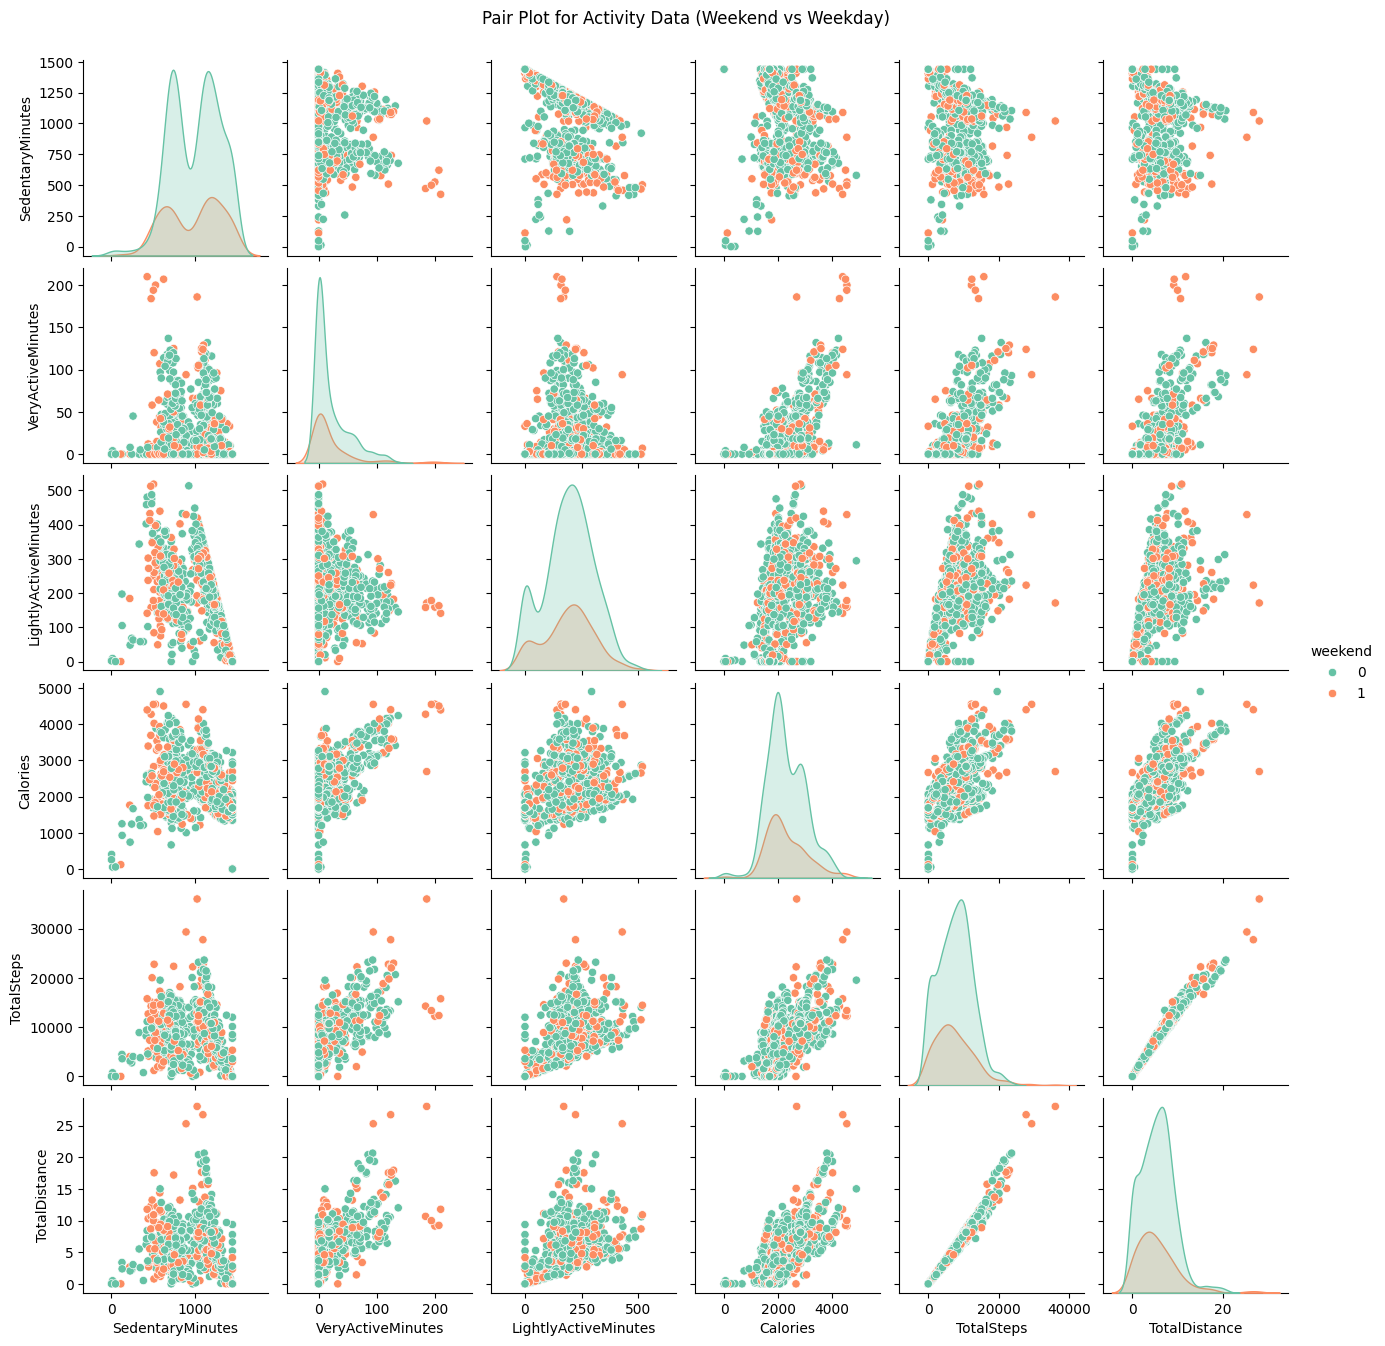

In [62]:
# Selecting relevant numerical columns
selected_columns = [
    'SedentaryMinutes',
    'VeryActiveMinutes',
    'LightlyActiveMinutes',
    'Calories',
    'TotalSteps',
    'TotalDistance'
]

# Plotting the pairplot
sb.pairplot(
    weekend_check,
    vars=selected_columns,
    hue='weekend',             
    palette='Set2',
    diag_kind='kde',           
    height=2.2
)

plt.suptitle('Pair Plot for Activity Data (Weekend vs Weekday)', y=1.02)
plt.show()


#### observation

**1-  Strong Linear Relationships Among Key Metrics**
* **Total Steps, Total Distance, and Calories** show a **strong, direct linear correlation.**
* As users take more steps, their distance naturally increases and they burn more calories.
* This consistent pattern is evident across both weekdays and weekends, indicating that these three variables are tightly connected and can predict each other’s values.

**2 - Sedentary Minutes: An Independent Behavior**
* Sedentary Minutes do not show any clear or consistent relationship with active variables like Calories, Steps, or Distance.
* High sedentary time can coexist with either high or low activity, suggesting that **some users may have long sedentary periods even if they are otherwise active.**
* This reflects **modern lifestyle patterns**, especially for people who may exercise but still spend large parts of the day sitting (e.g., office workers).

**3 - Weekend vs Weekday Activity Shifts**
* On **weekends**, many users tend to:
    * Spend **more sedentary time.**
    * Show **slightly lower levels of Total Steps and Total Distance.**

* On **weekdays**, there is a **wider spread of activity**:
    * Some users are highly active, possibly due to work-related movements or structured exercise.
    * Others remain sedentary, possibly desk-bound.

* This suggests that **weekdays are more behaviorally diverse**, while weekends generally shift users toward more rest and sedentary habits.

**4 - Activity Intensity Patterns**
* **Very Active Minutes vs. Lightly Active Minutes** show low to moderate relationship, implying that users typically engage in either light or very active tasks but not necessarily both in the same day.
* This may indicate that people’s activity days are either focused on light movement (like walking) or intense workouts, but they don’t usually mix both types.


**5 - Distribution Insights from Diagonal KDE Plots**
* Sedentary Minutes have a bimodal or skewed distribution, suggesting different lifestyle clusters: one group is generally more sedentary, another more active.
* Calories, Steps, and Distance show relatively **normal distributions**, but with longer tails on weekends indicating that a few users remain highly active even during off-days.



## **Solution to Business Objective**

Based on the detailed data analysis and visualizations, the following key solutions can be derived to meet the business objective of improving user fitness engagement and providing actionable health insights:

**1 . Personalized Interventions**: Users with high sedentary time and low activity can receive customized fitness challenges and nudges.

**2 . Weekend Engagement Campaigns**: Special activity events or step count challenges can be introduced over weekends to counteract the high sedentary time.

**3 . BMI-Based Recommendations**: Overweight and obese users can be provided with dietary plans, physical activity routines, and progress tracking to encourage weight management.

**4 . Dynamic Notifications**: Real-time alerts to reduce sedentary minutes can be sent based on user patterns identified in the analysis.

**5 . Targeted Fitness Programs**: Fitness plans should vary between user groups based on their average activity patterns, as identified in the boxplot and pair plot comparisons.



# **Conclusion**

The project successfully demonstrates that a significant proportion of users have high sedentary time and a concerning BMI distribution, indicating potential long-term health risks. These insights can help the business to design more effective, personalized fitness programs, focused weekend activities, and BMI-specific interventions.

By leveraging the insights from the Python-based analysis:

  * User engagement can be improved by offering relevant challenges and reducing sedentary behavior.

  * Health outcomes can be positively influenced by encouraging active lifestyles and addressing weight management proactively.

  * Backend systems should be optimized for smoother data operations to support growing user data and real-time analytics in the future.